In [19]:
import numpy as np
import pandas as pd
import utils
import seaborn as sn
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('data/results_fix.csv', index_col=0)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN6,_OPN7,_OPN8,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,5.0,3.0,4.0,5.0,46.0,36.0,39.0,32.0,45.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,5.0,4.0,2.0,5.0,3.0,20.0,35.0,44.0,37.0,35.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,5.0,3.0,4.0,4.0,25.0,34.0,42.0,34.0,41.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,5.0,4.0,4.0,3.0,3.0,26.0,31.0,38.0,25.0,39.0
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,5.0,4.0,5.0,2.0,32.0,38.0,38.0,37.0,44.0


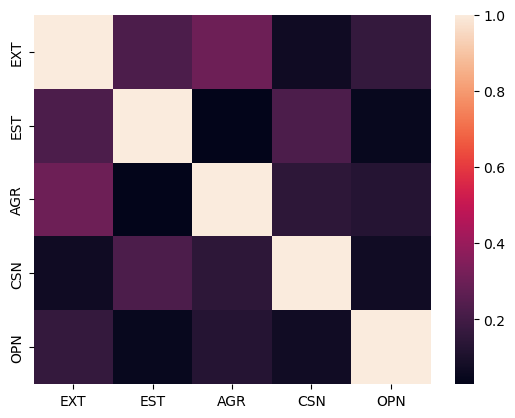

In [21]:
sn.heatmap(data.iloc[: , 100:105].corr())
plt.show()

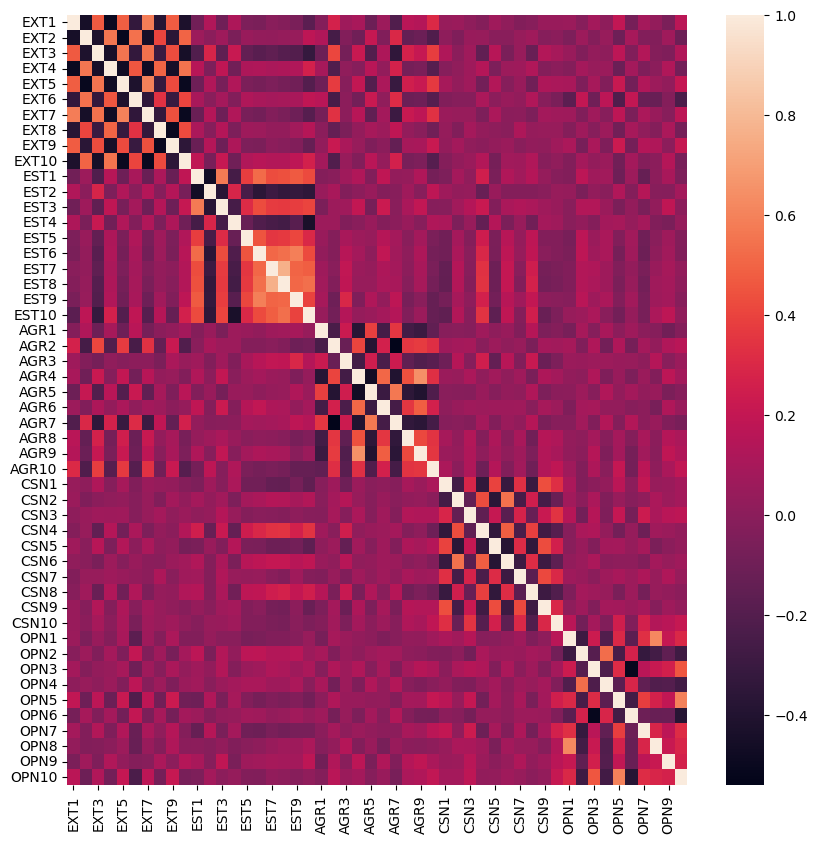

In [22]:
f, ax = plt.subplots(figsize=(10,10))
sn.heatmap(data.iloc[: , 0:50].corr())
plt.show()

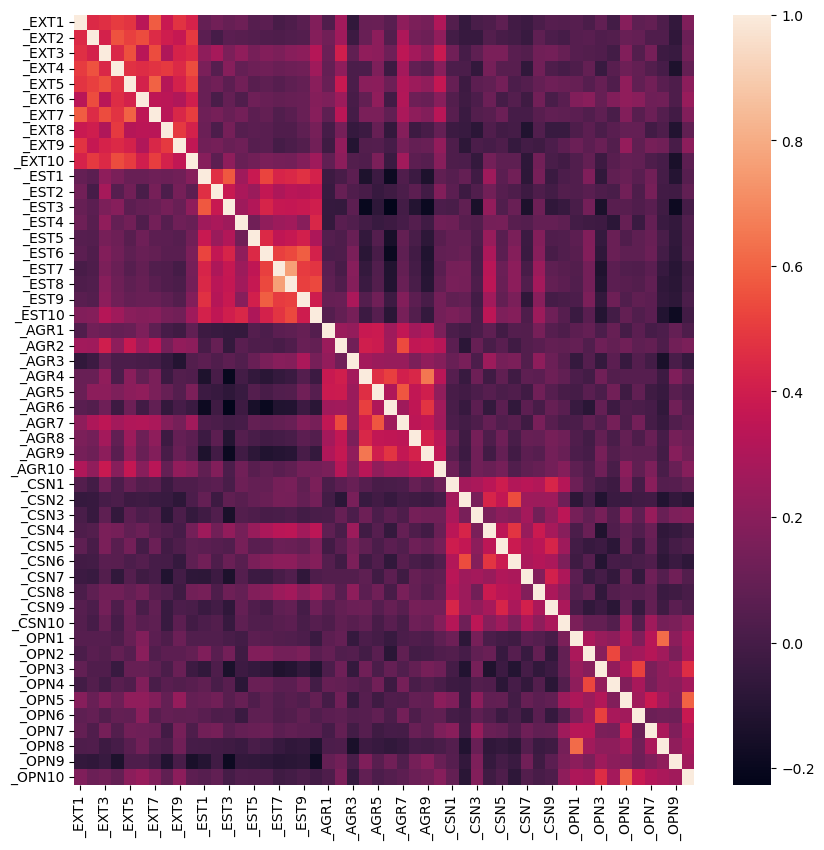

In [23]:
f, ax = plt.subplots(figsize=(10,10))
sn.heatmap(data.iloc[: , 50:100].corr())
plt.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696845 entries, 0 to 696844
Columns: 105 entries, EXT1 to OPN
dtypes: float64(105)
memory usage: 563.5 MB


In [25]:
data.isna().sum()

EXT1    1141
EXT2    1141
EXT3    1141
EXT4    1141
EXT5    1141
        ... 
EXT     1141
EST     1141
AGR     1141
CSN     1141
OPN     1141
Length: 105, dtype: int64

In [26]:
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN6,_OPN7,_OPN8,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,5.0,3.0,4.0,5.0,46.0,36.0,39.0,32.0,45.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,5.0,4.0,2.0,5.0,3.0,20.0,35.0,44.0,37.0,35.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,5.0,3.0,4.0,4.0,25.0,34.0,42.0,34.0,41.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,5.0,4.0,4.0,3.0,3.0,26.0,31.0,38.0,25.0,39.0
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,5.0,4.0,5.0,2.0,32.0,38.0,38.0,37.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696840,4.0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,...,4.0,5.0,2.0,3.0,4.0,38.0,32.0,40.0,34.0,36.0
696841,5.0,1.0,5.0,2.0,4.0,2.0,3.0,1.0,5.0,1.0,...,4.0,5.0,3.0,4.0,4.0,45.0,14.0,39.0,27.0,40.0
696842,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,5.0,3.0,4.0,5.0,4.0,32.0,16.0,39.0,28.0,45.0
696843,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,4.0,4.0,5.0,5.0,3.0,22.0,25.0,37.0,38.0,41.0


In [27]:
data=data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
data=data.reset_index(drop=True)
data.to_csv('data/results_fix_notnull.csv')  
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN6,_OPN7,_OPN8,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,5.0,3.0,4.0,5.0,46.0,36.0,39.0,32.0,45.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,5.0,4.0,2.0,5.0,3.0,20.0,35.0,44.0,37.0,35.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,4.0,5.0,3.0,4.0,4.0,25.0,34.0,42.0,34.0,41.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,5.0,4.0,4.0,3.0,3.0,26.0,31.0,38.0,25.0,39.0
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,5.0,4.0,5.0,2.0,32.0,38.0,38.0,37.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695699,4.0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,...,4.0,5.0,2.0,3.0,4.0,38.0,32.0,40.0,34.0,36.0
695700,5.0,1.0,5.0,2.0,4.0,2.0,3.0,1.0,5.0,1.0,...,4.0,5.0,3.0,4.0,4.0,45.0,14.0,39.0,27.0,40.0
695701,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,5.0,3.0,4.0,5.0,4.0,32.0,16.0,39.0,28.0,45.0
695702,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,4.0,4.0,5.0,5.0,3.0,22.0,25.0,37.0,38.0,41.0


In [28]:
data.isna().sum()

EXT1    0
EXT2    0
EXT3    0
EXT4    0
EXT5    0
       ..
EXT     0
EST     0
AGR     0
CSN     0
OPN     0
Length: 105, dtype: int64

In [ ]:
# data = data.drop_duplicates()
# data.to_csv('data/results4_fix.csv')  
# data